In [1]:
import numpy as np # Importe les fonctions de numpy
from numpy.random import normal as  norm # Import juste une fonction de numpy pour simplifier son nom par norm
from numpy import sqrt as  sqrt # Import juste une fonction de numpy pour simplifier son nom par sqrt
from random import Random

nb = 8525 # Nombre d'individus
Age = np.round(norm(size = nb,loc = 54,scale = 11),0) 
WBC = norm(size = nb,loc = 6000,scale = 9)# Simuations de WBC autour de 6000
Intercept=[1]*8525
RBC = norm(size = nb,loc = 4.6,scale = 2)
sex = np.random.randint(2, size=nb)
Married=np.random.randint(2, size=nb)
y=np.random.randint(2,4,8525)

In [2]:
import pandas as df # Importation de pandas pour la gestion des tableaux de données (dataframes)
from pandas import DataFrame as DataFrame # Importation uniquement de la fonction DataFrame pour réduire son écriture
compil = {'Intercept':Intercept,'Age':Age,'Married':Married,'sex':sex,'WBC':WBC,'RBC':RBC,'y':y}
compil = DataFrame(compil)
compil

,Intercept,Age,Married,sex,WBC,RBC,y
0,1,62.0,1,1,5984.774478,4.410777,3
1,1,59.0,0,1,5986.337158,3.901267,3
2,1,55.0,1,1,5994.767510,0.490396,3
3,1,59.0,0,0,6009.899252,3.237278,2
4,1,61.0,0,0,5990.658307,5.659483,3
...,...,...,...,...,...,...,...
8520,1,35.0,1,1,6004.342524,2.826003,2
8521,1,68.0,0,1,6011.992613,4.095995,3
8522,1,54.0,1,0,6008.933113,4.408397,3
8523,1,42.0,1,1,6010.741929,5.251219,2


In [3]:
compil.describe()

,Intercept,Age,Married,sex,WBC,RBC,y
count,8525.0,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000
mean,1.0,54.087507,0.498182,0.490674,5999.919254,4.579740,2.501349
std,0.0,11.000196,0.500026,0.499942,8.845172,2.009176,0.500028
min,1.0,1.000000,0.000000,0.000000,5967.113953,-4.625485,2.000000
25%,1.0,47.000000,0.000000,0.000000,5994.014064,3.231917,2.000000
50%,1.0,54.000000,0.000000,0.000000,6000.074902,4.576084,3.000000
75%,1.0,62.000000,1.000000,1.000000,6005.820214,5.957925,3.000000
max,1.0,105.000000,1.000000,1.000000,6034.336317,12.467290,3.000000


In [4]:
compil[:3]#Afficher les 3 premères lignes du tableau

,Intercept,Age,Married,sex,WBC,RBC,y
0,1,62.0,1,1,5984.774478,4.410777,3
1,1,59.0,0,1,5986.337158,3.901267,3
2,1,55.0,1,1,5994.767510,0.490396,3


Dans ce qui suit, nous travaillerons principalement avec Poisson. Tout en utilisant les affaires décimales, nous les convertissons en entiers pour avoir une distribution de comptage.

In [5]:
compil["WBC"] = np.ceil(compil["WBC"])
compil["RBC"] = np.ceil(compil["RBC"])
compil[:3]

,Intercept,Age,Married,sex,WBC,RBC,y
0,1,62.0,1,1,5985.0,5.0,3
1,1,59.0,0,1,5987.0,4.0,3
2,1,55.0,1,1,5995.0,1.0,3


In [6]:
(compil["y"] == 0).mean()

0.0

In [7]:
np.bincount(compil["y"].astype(int))

array([   0,    0, 4251, 4274])

In [8]:
data=compil
import statsmodels.formula.api as smf
import statsmodels.api as sm
glm = smf.glm('y ~ sex + Age + Married+WBC+RBC',
              data=data, family=sm.families.Poisson())

res_o = glm.fit()
print(res_o.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 8525
Model:                            GLM   Df Residuals:                     8519
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12378.
Date:                Sun, 08 Nov 2020   Deviance:                       857.41
Time:                        13:43:33   Pearson chi2:                     851.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6757      4.646     -0.361      0.7

In [9]:
res_o.pearson_chi2 / res_o.df_resid

0.09993624131189242

In [10]:
import statsmodels.formula.api as smf
from patsy import dmatrices
formula = "y ~ sex*Married*Age"
md  = smf.mixedlm(formula, compil, groups=compil["Intercept"])
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  y         
No. Observations:    8525     Method:              REML      
No. Groups:          1        Scale:               0.2501    
Min. group size:     8525     Log-Likelihood:      -6224.0023
Max. group size:     8525     Converged:           Yes       
Mean group size:     8525.0                                  
-------------------------------------------------------------
                Coef.    Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept        2.544       0.503  5.056 0.000  1.558  3.530
sex             -0.103       0.077 -1.335 0.182 -0.253  0.048
Married         -0.046       0.076 -0.608 0.543 -0.196  0.103
sex:Married      0.105       0.109  0.968 0.333 -0.108  0.319
Age             -0.001       0.001 -0.731 0.465 -0.003  0.001
sex:Age          0.002       0.001  1.353 0.176 -0.001  0.005
Married:Age      0.0

In [11]:
import statsmodels.formula.api as smf
from patsy import dmatrices
formula = "y ~ WBC*RBC"
md  = smf.mixedlm(formula, compil, groups=compil["Intercept"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: y         
No. Observations:  8525    Method:             REML      
No. Groups:        1       Scale:              0.2499    
Min. group size:   8525    Log-Likelihood:     -6206.3716
Max. group size:   8525    Converged:          Yes       
Mean group size:   8525.0                                
---------------------------------------------------------
           Coef.    Std.Err.    z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept -16.435       9.875 -1.664 0.096 -35.789  2.919
WBC         0.003       0.002  1.923 0.055  -0.000  0.006
RBC         2.440       1.799  1.357 0.175  -1.085  5.965
WBC:RBC    -0.000       0.000 -1.359 0.174  -0.001  0.000
Group Var   0.250 1118891.307                            



In [13]:
import pandas as pd
fe_params = pd.DataFrame(mdf.fe_params,columns=['LMM'])
random_effects = pd.DataFrame(mdf.random_effects)
random_effects = random_effects.transpose()
random_effects = random_effects.rename(index=str, columns={'groups': 'LMM'})

In [14]:
Y, X   = dmatrices(formula, data=compil, return_type='matrix')
Terms  = X.design_info.column_names
_, Z   = dmatrices('y ~ -1+RBC+WBC+Age+sex+Married', data=compil, return_type='matrix')

X      = np.asarray(X) # fixed effect
Z      = np.asarray(Z) # mixed effect
Y      = np.asarray(Y).flatten()
nfixed = np.shape(X)
nrandm = np.shape(Z)

AttributeError: 'Index' object has no attribute 'get_values'

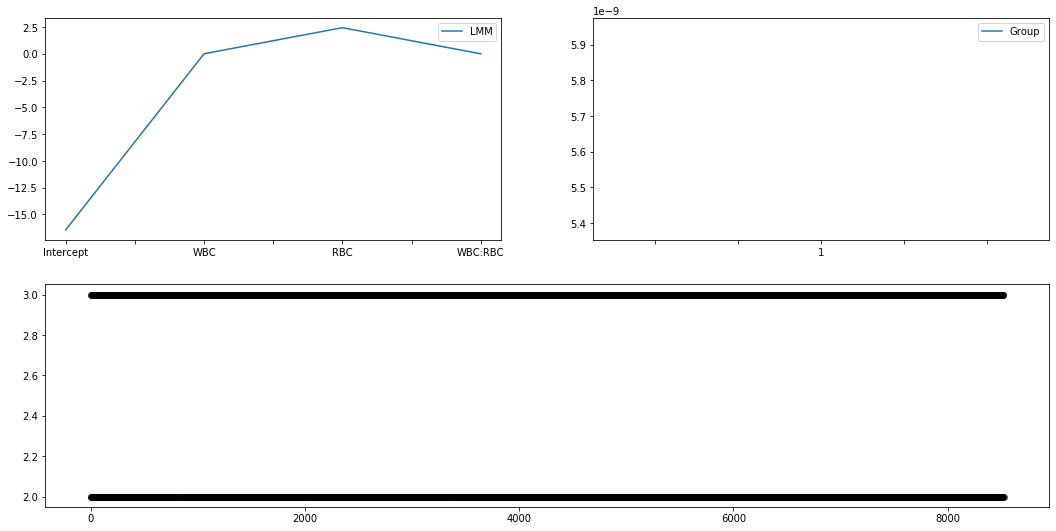

In [17]:
#%% ploting function 
import matplotlib.pyplot as plt
def plotfitted(fe_params=fe_params,random_effects=random_effects,X=X,Z=Z,Y=Y):
    plt.figure(figsize=(18,9))
    ax1 = plt.subplot2grid((2,2), (0, 0))
    ax2 = plt.subplot2grid((2,2), (0, 1))
    ax3 = plt.subplot2grid((2,2), (1, 0), colspan=2)
    
    fe_params.plot(ax=ax1)
    random_effects.plot(ax=ax2)
    
    ax3.plot(Y.flatten(),'o',color='k',label = 'Observed', alpha=.25)
    for iname in fe_params.columns.get_values():
        fitted = np.dot(X,fe_params[iname])+np.dot(Z,random_effects[iname]).flatten()
        print("The MSE of "+iname+ " is " + str(np.mean(np.square(Y.flatten()-fitted))))
        ax3.plot(fitted,lw=1,label = iname, alpha=.5)
    ax3.legend(loc=0)
    #plt.ylim([0,5])
    plt.show()

plotfitted(fe_params=fe_params,random_effects=random_effects,X=X,Z=Z,Y=Y)